In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True)
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython import display

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_synonyms,molecule_type,natural_product,oral,parenteral,pref_name,topical
0,CHEMBL2,,1,2,1976.0,0,0,"[{'synonyms': 'CP-12299', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'CP-12299'}, {'synonyms': 'Prazosin', 'syn_type': 'FDA', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'BAN', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'INN', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'ATC', 'molecule_synonym': 'Prazosin'}]",Small molecule,0,True,False,PRAZOSIN,False
1,CHEMBL266459,,-2,2,1980.0,0,0,"[{'synonyms': 'ZOMAX', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Zomax'}, {'synonyms': 'MCN-2783-21-98', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'MCN-2783-21-98'}, {'synonyms': 'ZOMEPIRAC SODIUM', 'syn_type': 'USP', 'molecule_synonym': 'Zomepirac Sodium'}, {'synonyms': 'ZOMEPIRAC SODIUM', 'syn_type': 'USAN', 'molecule_synonym': 'Zomepirac Sodium'}, {'synonyms': 'Zomepirac sodium', 'syn_type': 'OTHER', 'molecule_synonym': 'Zomepirac Sodium'}]",Small molecule,0,False,False,ZOMEPIRAC SODIUM,False
2,CHEMBL3,,2,1,1984.0,0,0,"[{'synonyms': 'NICODERM', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicoderm'}, {'synonyms': 'NICOTINE', 'syn_type': 'MERCK_INDEX', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTINE', 'syn_type': 'FDA', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTINE', 'syn_type': 'USP', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTROL', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol'}, {'synonyms': 'Habitrol', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Habitrol'}, {'synonyms': 'Nicoderm CQ', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicoderm CQ'}, {'synonyms': 'Nicotine', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'Nicotine', 'syn_type': 'USAN', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'Prostep', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Prostep'}, {'synonyms': 'Nicotrol NS', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol NS'}, {'synonyms': 'Nicotrol Inhaler', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol Inhaler'}, {'synonyms': 'NICOTINE', 'syn_type': 'ATC', 'molecule_synonym': 'Nicotine'}]",Small molecule,1,True,False,NICOTINE,True
3,CHEMBL4,,1,0,1990.0,0,0,"[{'synonyms': 'FLOXIN', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Floxin'}, {'synonyms': 'DL-8280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'DL-8280'}, {'synonyms': 'HOE 280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'HOE-280'}, {'synonyms': 'OCUFLOX', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ocuflox'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'BAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'FDA', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'INN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'JAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'USP', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'USAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'Floxin otic', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Floxin Otic'}, {'synonyms': 'HOE-280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'HOE-280'}, {'synonyms': 'Ofloxacin', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'Tarivid', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Tarivid'}, {'synonyms': 'Visiren', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Visiren'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'ATC', 'molecule_synonym': 'Ofloxacin'}]",Small molecule,0,True,True,OFLOXACIN,True
4,CHEMBL5,,0,2,1964.0,0,0,"[{'synonyms': 'NEGGRAM', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Neggram'}, {'synonyms': 'NALIDIXANE', 'syn_type': 'OTHER', 'molecule_synonym': 'Nalidixane'}, {'synonyms': 'WIN 18,320', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'WIN-183
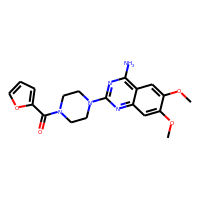
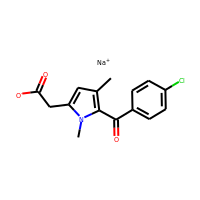
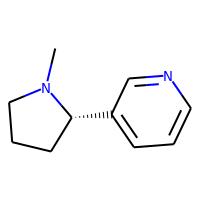
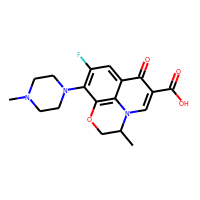
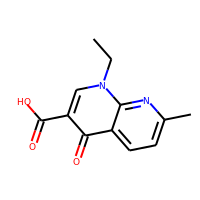

In [2]:
#Load the sdf from approved drugs download on chembl
df_meds = PandasTools.LoadSDF('./data/meds.sdf', isomericSmiles=True)
df_meds.head()

In [3]:
#First let's look what we have
print(len(df_meds))
df_meds['molecule_type'].value_counts()

3371


Small molecule     3277
Protein              73
Unknown              17
Oligosaccharide       2
Oligonucleotide       2
Name: molecule_type, dtype: int64

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_synonyms,molecule_type,natural_product,oral,parenteral,pref_name,topical
1947,CHEMBL1200644,,1,1,2001.0,0,0,"[{'synonyms': 'ARIXTRA', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Arixtra'}, {'synonyms': 'ORG 31540', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'ORG-31540'}, {'synonyms': 'SR 90107A', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'SR-90107A'}, {'synonyms': 'FONDAPARINUX SODIUM', 'syn_type': 'BAN', 'molecule_synonym': 'Fondaparinux Sodium'}, {'synonyms': 'FONDAPARINUX SODIUM', 'syn_type': 'FDA', 'molecule_synonym': 'Fondaparinux Sodium'}, {'synonyms': 'FONDAPARINUX SODIUM', 'syn_type': 'INN', 'molecule_synonym': 'Fondaparinux Sodium'}, {'synonyms': 'FONDAPARINUX SODIUM', 'syn_type': 'USAN', 'molecule_synonym': 'Fondaparinux Sodium'}, {'synonyms': 'FONDAPARINUX SODIUM', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Fondaparinux Sodium'}, {'synonyms': 'ORG-31540', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'ORG-31540'}, {'synonyms': 'SR-90107A', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'SR-90107A'}]",Oligosaccharide,0,False,True,FONDAPARINUX SODIUM,False
2356,CHEMBL1201202,,1,1,2001.0,0,0,"[{'synonyms': 'Fondaparinux', 'syn_type': 'INN', 'molecule_synonym': 'Fondaparinux'}, {'synonyms': 'FONDAPARINUX', 'syn_type': 'ATC', 'molecule_synonym': 'Fondaparinux'}]",Oligosaccharide,0,False,True,FONDAPARINUX,False

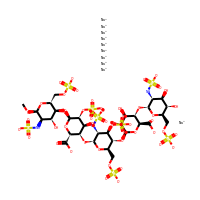
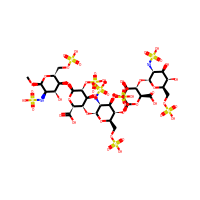

In [4]:
#Watch a category
df_meds[df_meds.molecule_type == 'Oligosaccharide'].head()

In [5]:
#On garde seulement une catégorie
df_meds = df_meds[df_meds['molecule_type'] == 'Small molecule']

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_synonyms,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture
0,CHEMBL2,,1,2,1976.0,0,0,"[{'synonyms': 'CP-12299', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'CP-12299'}, {'synonyms': 'Prazosin', 'syn_type': 'FDA', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'BAN', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'INN', 'molecule_synonym': 'Prazosin'}, {'synonyms': 'PRAZOSIN', 'syn_type': 'ATC', 'molecule_synonym': 'Prazosin'}]",Small molecule,0,True,False,PRAZOSIN,False,1
1,CHEMBL266459,,-2,2,1980.0,0,0,"[{'synonyms': 'ZOMAX', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Zomax'}, {'synonyms': 'MCN-2783-21-98', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'MCN-2783-21-98'}, {'synonyms': 'ZOMEPIRAC SODIUM', 'syn_type': 'USP', 'molecule_synonym': 'Zomepirac Sodium'}, {'synonyms': 'ZOMEPIRAC SODIUM', 'syn_type': 'USAN', 'molecule_synonym': 'Zomepirac Sodium'}, {'synonyms': 'Zomepirac sodium', 'syn_type': 'OTHER', 'molecule_synonym': 'Zomepirac Sodium'}]",Small molecule,0,False,False,ZOMEPIRAC SODIUM,False,2
2,CHEMBL3,,2,1,1984.0,0,0,"[{'synonyms': 'NICODERM', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicoderm'}, {'synonyms': 'NICOTINE', 'syn_type': 'MERCK_INDEX', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTINE', 'syn_type': 'FDA', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTINE', 'syn_type': 'USP', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'NICOTROL', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol'}, {'synonyms': 'Habitrol', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Habitrol'}, {'synonyms': 'Nicoderm CQ', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicoderm CQ'}, {'synonyms': 'Nicotine', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'Nicotine', 'syn_type': 'USAN', 'molecule_synonym': 'Nicotine'}, {'synonyms': 'Prostep', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Prostep'}, {'synonyms': 'Nicotrol NS', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol NS'}, {'synonyms': 'Nicotrol Inhaler', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Nicotrol Inhaler'}, {'synonyms': 'NICOTINE', 'syn_type': 'ATC', 'molecule_synonym': 'Nicotine'}]",Small molecule,1,True,False,NICOTINE,True,1
3,CHEMBL4,,1,0,1990.0,0,0,"[{'synonyms': 'FLOXIN', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Floxin'}, {'synonyms': 'DL-8280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'DL-8280'}, {'synonyms': 'HOE 280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'HOE-280'}, {'synonyms': 'OCUFLOX', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ocuflox'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'BAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'FDA', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'INN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'JAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'USP', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'USAN', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'Floxin otic', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Floxin Otic'}, {'synonyms': 'HOE-280', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'HOE-280'}, {'synonyms': 'Ofloxacin', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ofloxacin'}, {'synonyms': 'Tarivid', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Tarivid'}, {'synonyms': 'Visiren', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Visiren'}, {'synonyms': 'OFLOXACIN', 'syn_type': 'ATC', 'molecule_synonym': 'Ofloxacin'}]",Small molecule,0,True,True,OFLOXACIN,True,1
4,CHEMBL5,,0,2,1964.0,0,0,"[{'synonyms': 'NEGGRAM', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Neggram'}, {'synonyms': 'NALIDIXANE', 'syn_type': 'OTHER', 'molecule_synonym': 'Nalidixane'}, {'synonyms': 'WIN 18,320', 'syn_type': 'RESEARCH_CODE', 'molecule_sy
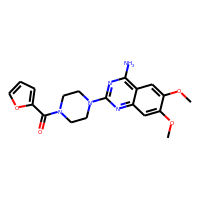
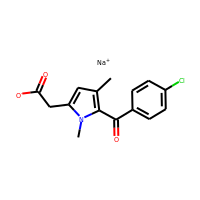
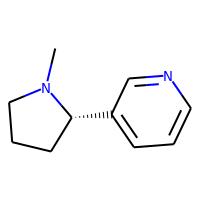
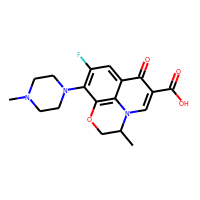
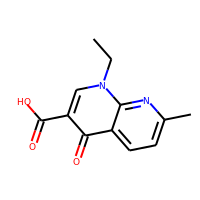

In [6]:
#On garde seulement les molécules seules
def number_frags(mol):
    return(len(Chem.rdmolops.GetMolFrags(mol)))

df_meds['Mixture'] = df_meds['ROMol'].apply(number_frags)
df_meds.head()

In [7]:
df_meds['Mixture'].value_counts()

1     2115
2      890
3      199
4       31
5       17
7        7
8        5
6        4
9        3
49       1
29       1
25       1
13       1
48       1
10       1
Name: Mixture, dtype: int64

In [8]:
df_meds = df_meds[df_meds['Mixture'] == 1]
len(df_meds)

2115

In [9]:
#On regarde les dates de sorties
df_meds['first_approval'].value_counts()

nan       626
1982.0    109
1996.0     47
1997.0     37
1985.0     36
1999.0     35
2015.0     32
2014.0     30
1995.0     30
1992.0     29
1991.0     29
1986.0     27
2001.0     26
1981.0     26
1984.0     26
1974.0     25
2009.0     25
2004.0     24
1959.0     24
2011.0     24
2008.0     23
2000.0     23
1960.0     23
2012.0     23
1993.0     23
1998.0     23
2006.0     22
1990.0     22
1979.0     22
2013.0     21
         ... 
2016.0     15
1971.0     14
1955.0     14
2005.0     14
1962.0     14
1980.0     13
1975.0     13
1956.0     12
1969.0     12
1970.0     12
1972.0     12
1951.0     11
1958.0     10
1954.0     10
1952.0      9
1963.0      9
1946.0      8
1968.0      8
1966.0      7
1949.0      7
1948.0      6
2017.0      6
1945.0      5
1939.0      5
1947.0      4
1943.0      3
1941.0      2
1940.0      1
1942.0      1
1944.0      1
Name: first_approval, Length: 80, dtype: int64

In [10]:
df_meds.dropna(subset=['first_approval'], inplace=True)
df_meds['first_approval'] = df_meds['first_approval'].astype(float)
len(df_meds)

2115

In [11]:
len(df_meds[df_meds['first_approval'] >= 2000])

383

In [12]:
df_meds[df_meds['first_approval'] >= 2000]['natural_product'].value_counts()

0    289
1     94
Name: natural_product, dtype: int64

In [13]:
df_meds = df_meds[df_meds['first_approval'] >= 2000]

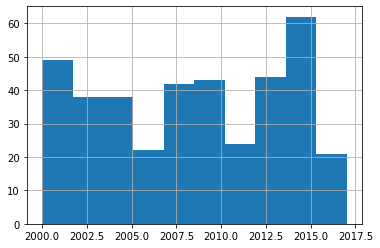

In [14]:
%matplotlib inline

#On peut regarder sous forme d'histogramme
df_meds['first_approval'].hist()


In [15]:
#On prépare ce qu'on a besoin pour l'ACP 
df_PCA = df_meds[['ID', 'natural_product', 'ROMol']]

### Calculating our descriptors 

In [16]:
#RDKIT Descriptors 
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski

#### Liste des descripteurs : 
#### ['FCSP3', 'HBA', 'HBD', 'LabuteASA', 'LogP', 'MQN10', 'MQN8', 'MW', 'NAR', 'NRB', 'TPSA']

In [17]:
df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['LabuteASA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['MQN8'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,ID,natural_product,ROMol,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,CHEMBL430,0,,389.1,1.0,123.0,158.7,8,2,0.444444,2,4,2,5
105,CHEMBL53,1,,267.1,2.8,43.7,117.6,3,2,0.294118,0,2,2,0
143,CHEMBL494,1,,360.2,3.5,77.8,156.6,3,3,0.681818,0,4,0,8
183,CHEMBL98,0,,264.1,2.5,78.4,112.5,3,3,0.428571,2,3,1,8
202,CHEMBL535,0,,398.2,3.3,77.2,169.7,3,3,0.363636,2,2,2,7

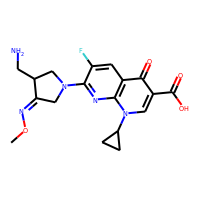
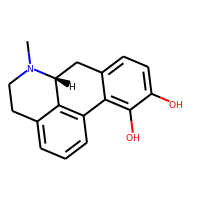
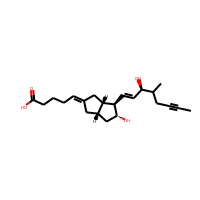
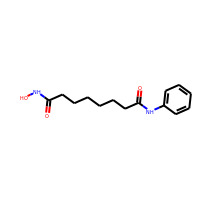
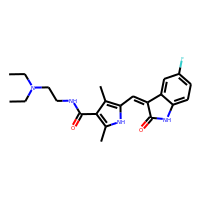

In [18]:
df_PCA.head()

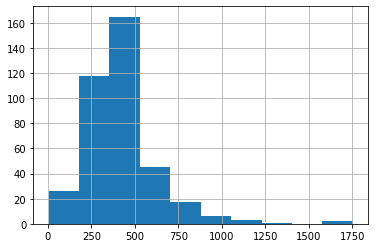

In [19]:
#Distribution des MWs
from IPython import display
%matplotlib inline
df_PCA.MW.hist()

In [20]:
#Pas au dessus de 700 et en dessous de 200 
df_PCA = df_PCA[df_PCA['MW'].between(200, 700)]
len(df_PCA)

318

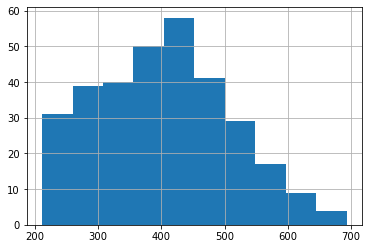

In [21]:
df_PCA.MW.hist()

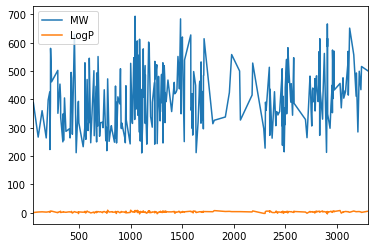

In [22]:
#On peut regarder la projection des molécules selon différentes variables 
df_PCA[['MW', 'LogP']].plot()

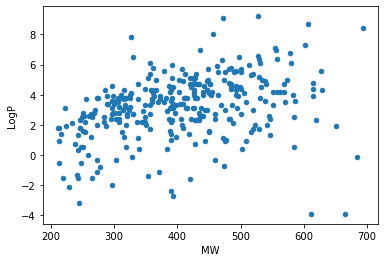

In [23]:
df_PCA.plot(x='MW', y='LogP', kind='scatter')

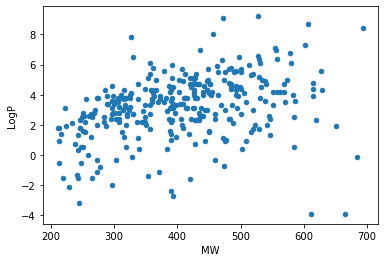

In [24]:
df_PCA.plot.scatter(x='MW', y='LogP')

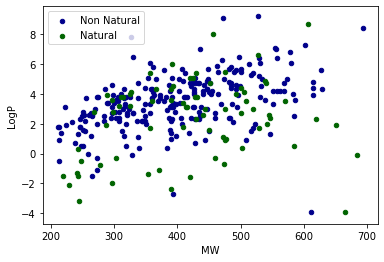

In [25]:
ax = df_PCA[df_PCA['natural_product'] == '0'].plot.scatter(x='MW', y='LogP', color='DarkBlue', label='Non Natural')
df_PCA[df_PCA['natural_product'] == '1'].plot.scatter(x='MW', y='LogP', color='DarkGreen', label='Natural', ax=ax)





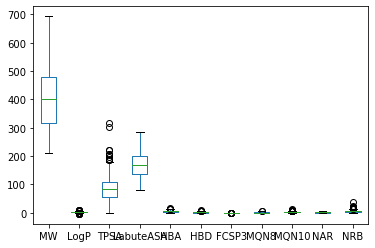

In [26]:
#on peut regarder les valeurs des différents descripteurs 
df_PCA.plot.box()

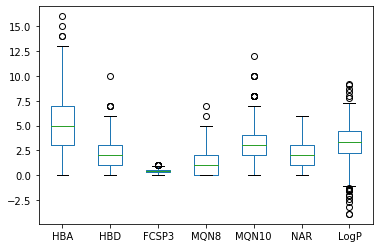

In [27]:
#Sans prendre en compte les valeurs trop grandes
x = list(range(7,13))
x.append(4)

df_PCA.iloc[:, x].plot.box()

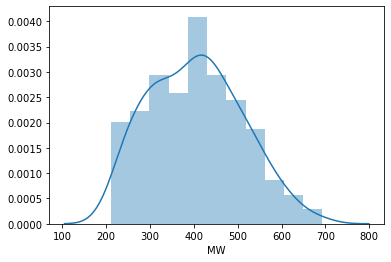

In [28]:
#La librairie seaborn peut-être plus adaptée pour les graphiques 
import seaborn as sns
import matplotlib.pyplot as plt #couplée avec

sns.distplot(df_PCA.MW, )

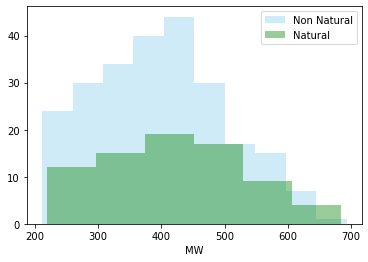

In [29]:
#On peut regarder la distribution sur le même graphique selon la catégorie
sns.distplot(df_PCA[df_PCA['natural_product'] == '0']['MW'] , color="skyblue", label="Non Natural", kde=False)
sns.distplot(df_PCA[df_PCA['natural_product'] == '1']['MW'] , color="green", label="Natural", kde=False)
plt.legend()

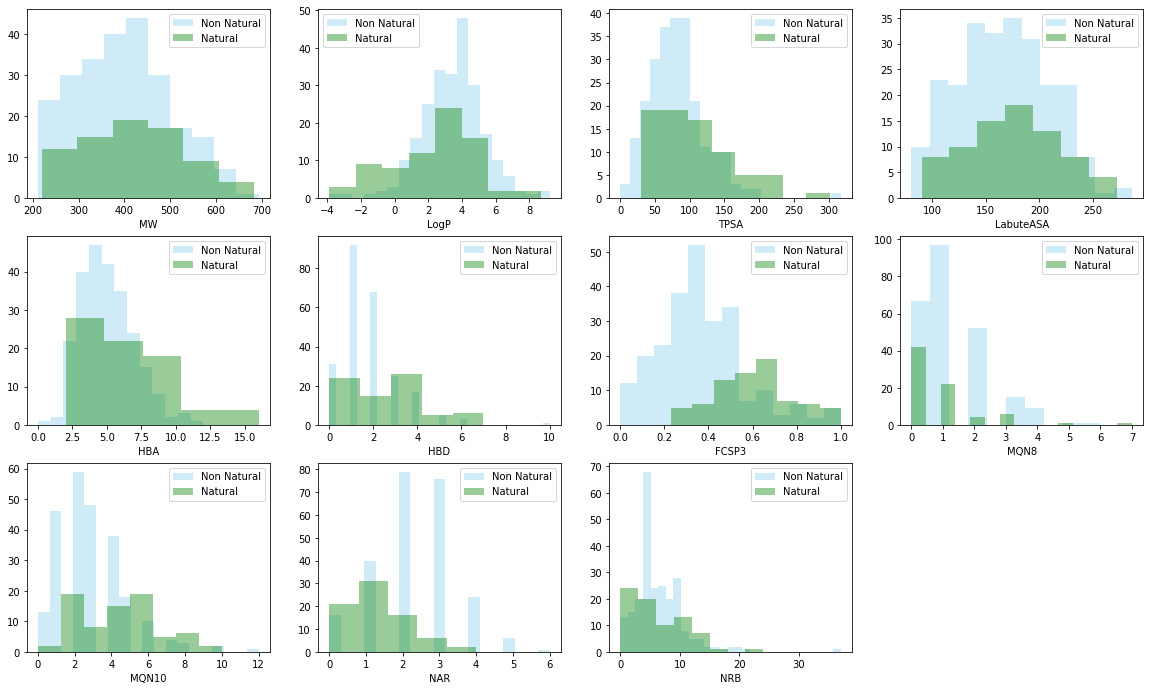

In [30]:
#Pour regarder tous les descripteurs :

plt.figure(figsize=(20, 16))

j=1
for i in df_PCA.iloc[:, 3:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '0'][i] , color="skyblue", label="Non Natural", kde=False)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '1'][i] , color="green", label="Natural", kde=False)
    plt.legend()
    j += 1


In [31]:
#Matrice de corrélation
df_PCA.corr()

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
MW,1.000000,0.359521,0.452450,0.980062,0.561417,0.189812,-0.006953,0.186963,0.443247,0.376293,0.496977
LogP,0.359521,1.000000,-0.528681,0.419578,-0.361767,-0.510750,-0.106204,-0.269431,-0.321394,0.314197,0.167179
TPSA,0.452450,-0.528681,1.000000,0.385704,0.804565,0.722662,-0.029442,0.519983,0.742238,0.090495,0.309041
LabuteASA,0.980062,0.419578,0.385704,1.000000,0.509746,0.151885,0.003770,0.169105,0.388596,0.383524,0.502924
HBA,0.561417,-0.361767,0.804565,0.509746,1.000000,0.380308,-0.022404,0.310403,0.611059,0.243134,0.336820
HBD,0.189812,-0.510750,0.722662,0.151885,0.380308,1.000000,0.046633,0.513143,0.461032,-0.079675,0.199290
FCSP3,-0.006953,-0.106204,-0.029442,0.003770,-0.022404,0.046633,1.000000,-0.206889,0.211957,-0.757421,0.218829
MQN8,0.186963,-0.269431,0.519983,0.169105,0.310403,0.513143,-0.206889,1.000000,0.136114,0.116114,0.199157
MQN10,0.443247,-0.321394,0.742238,0.388596,0.611059,0.461032,0.211957,0.136114,1.000000,-0.197495,0.516191
NAR,0.376293,0.314197,0.090495,0.383524,0.243134,-0.079675,-0.757421,0.116114,-0.197495,1.000000,0.003577


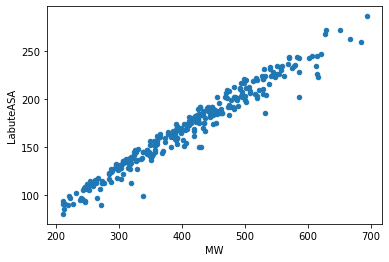

In [32]:
df_PCA.plot.scatter(x='MW', y='LabuteASA')

### Start ACP 

pip install prince=='0.2.6'

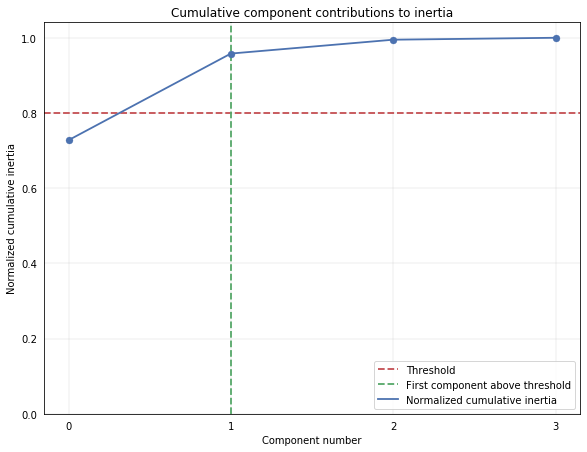

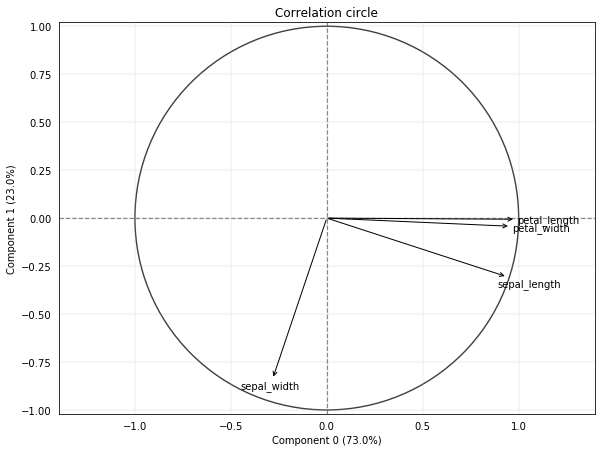

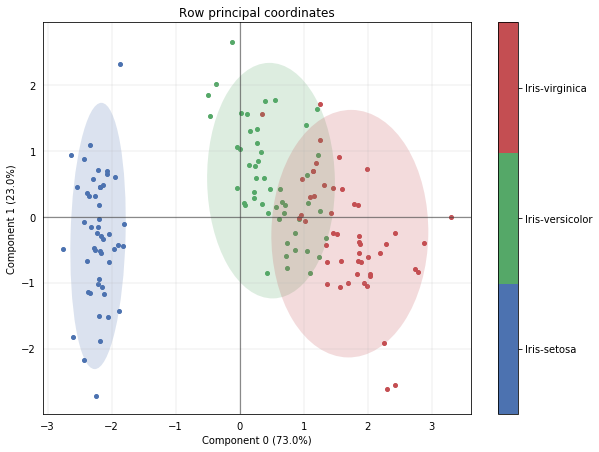

In [33]:
#utilisation de Prince par un exemple classique 

import matplotlib.pyplot as plt
import prince


df = pd.read_csv('https://raw.githubusercontent.com/kormilitzin/Prince/master/examples/data/iris.csv')
#on lit un datasetr tout fait 

pca = prince.PCA(df, n_components=4)

fig1, ax1 = pca.plot_cumulative_inertia()
fig2, ax2 = pca.plot_correlation_circle()
fig3, ax3 = pca.plot_rows(axes=[0,1], color_by='class', ellipse_fill=True)

plt.show()

In [34]:
df_PCA2 = df_PCA.copy() #On prend une copie car Prince effectue des changements sur le DF
pca1 = prince.PCA(df_PCA2, n_components=4)
pca1?

In [35]:
pca1.X.head() #= valeurs standardisées des descripteurs (DF)

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,-0.139618,-1.047413,0.789689,-0.215856,1.045315,0.022450,0.079200,0.773937,0.387584,-0.028270,-0.316304
105,-1.296076,-0.185882,-0.968061,-1.184141,-0.907741,0.022450,-0.603683,-0.965370,-0.586738,-0.028270,-1.475112
143,-0.413566,0.149157,-0.212206,-0.265330,-0.907741,0.671445,1.157506,-0.965370,0.387584,-1.662777,0.378981
183,-1.324513,-0.329471,-0.198907,-1.304293,-0.907741,0.671445,0.007094,0.773937,-0.099577,-0.845523,0.378981
202,-0.053358,0.053432,-0.225506,0.043296,-0.907741,0.671445,-0.287883,0.773937,-0.586738,-0.028270,0.147220


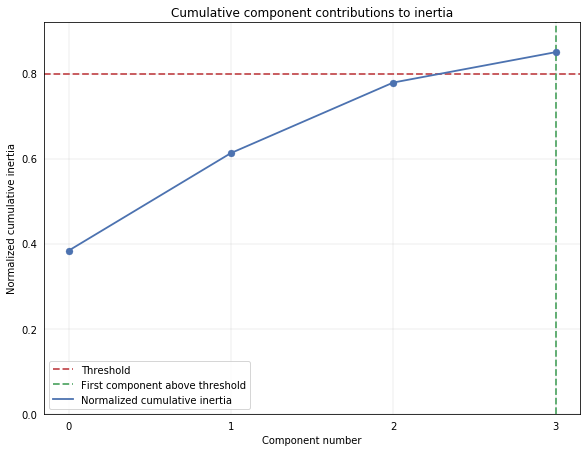

In [36]:
#Les fonctions pour représenter l'ACP sont incluses dans le package. 
fig1, ax1 = pca1.plot_cumulative_inertia()
plt.show()

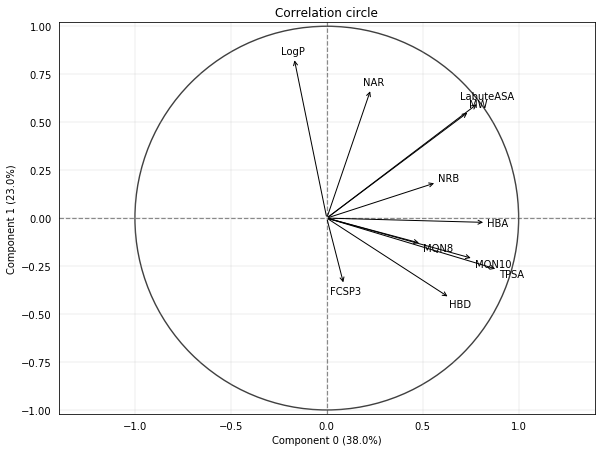

In [37]:
#Le cercle des corrélations
fig2, ax2 = pca1.plot_correlation_circle()
plt.show()

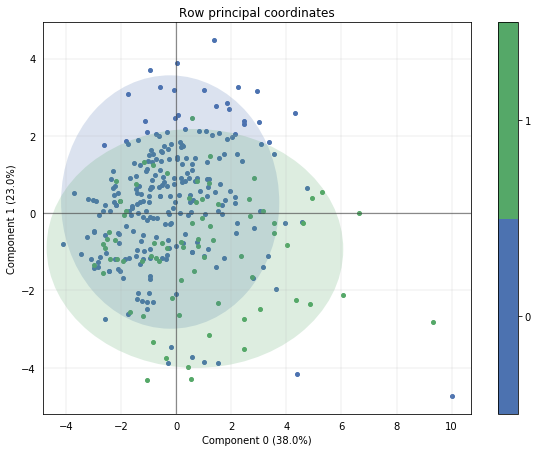

In [38]:
fig2, ax2 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
plt.show()

In [39]:
#Corrélation des variables :
pca1.column_correlations

,0,1,2,3
MW,0.741308,0.576073,-0.204756,-0.035588
LogP,-0.240056,0.853586,-0.290230,-0.208758
TPSA,0.898279,-0.305517,0.200469,0.103270
LabuteASA,0.696582,0.620115,-0.228767,-0.077072
HBA,0.835626,-0.039768,0.108959,0.359097
HBD,0.636808,-0.465734,0.211020,-0.339924
FCSP3,0.016480,-0.397192,-0.830887,-0.136062
MQN8,0.500836,-0.171300,0.439384,-0.599403
MQN10,0.770818,-0.255536,-0.293856,0.307270
NAR,0.186426,0.691821,0.616716,0.135640


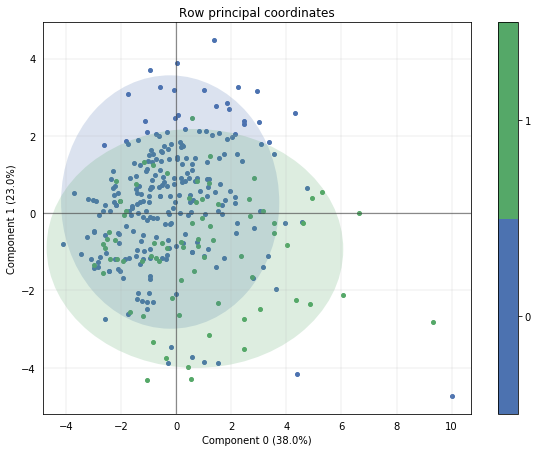

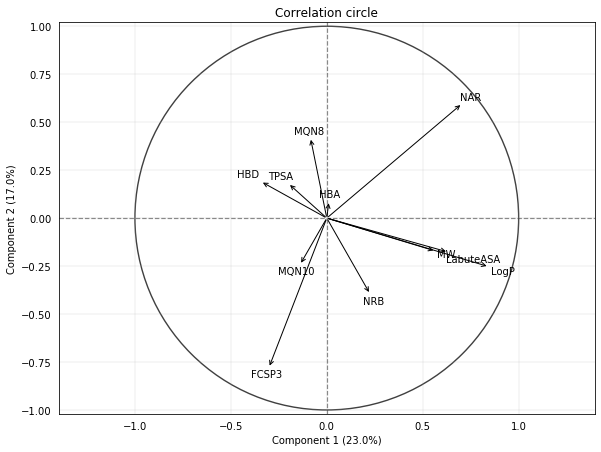

In [40]:
#On peut aussi représenter les autres composantes
fig1, ax1 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
fig2, ax2 =pca1.plot_correlation_circle(axes=[1,2])

plt.show()


Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


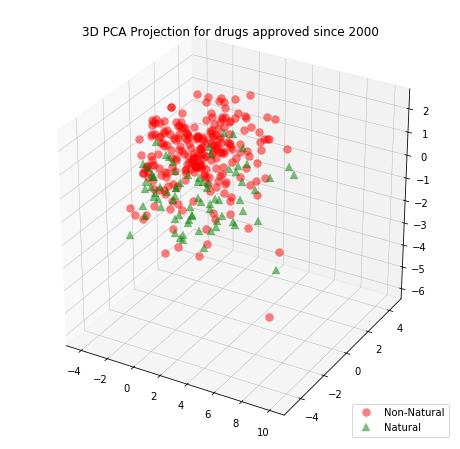

In [41]:
#Possible de représenter en 3D

#Besoin des indexes pour chaque catégorie
non_nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '0'].index
nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '1'].index


%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(pca1.row_principal_coordinates[0][non_nat], pca1.row_principal_coordinates[1][non_nat], pca1.row_principal_coordinates[2][non_nat], 'o', markersize=8, color='red', alpha=0.5, label='Non-Natural')
ax.plot(pca1.row_principal_coordinates[0][nat], pca1.row_principal_coordinates[1][nat], pca1.row_principal_coordinates[2][nat], '^', markersize=8, alpha=0.5, color='green', label='Natural')

plt.title('3D PCA Projection for drugs approved since 2000')
ax.legend(loc='lower right')

plt.show()

In [42]:
#Contribution de chaque valeur dans les composantes
pca1.row_component_contributions

,0,1,2,3
58,0.000777,1.506672e-03,8.427334e-04,8.310377e-04
105,0.004718,5.615162e-04,1.348268e-03,9.422959e-04
143,0.000302,1.900290e-03,6.367096e-03,6.257949e-04
183,0.000674,3.581248e-03,1.103552e-04,4.364027e-03
202,0.000053,3.050306e-07,4.026289e-04,7.183665e-03
217,0.000197,3.165708e-03,4.841316e-04,3.719950e-03
219,0.006708,2.519138e-03,5.028469e-04,3.017663e-04
224,0.000086,8.454644e-04,1.531837e-04,2.343015e-03
225,0.003832,1.336726e-02,1.954010e-03,3.902196e-04
235,0.000832,5.475508e-03,3.686687e-04,7.159691e-04


In [43]:
df_PCA.columns

Index(['ID', 'natural_product', 'ROMol', 'MW', 'LogP', 'TPSA', 'LabuteASA',
       'HBA', 'HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB'],
      dtype='object')

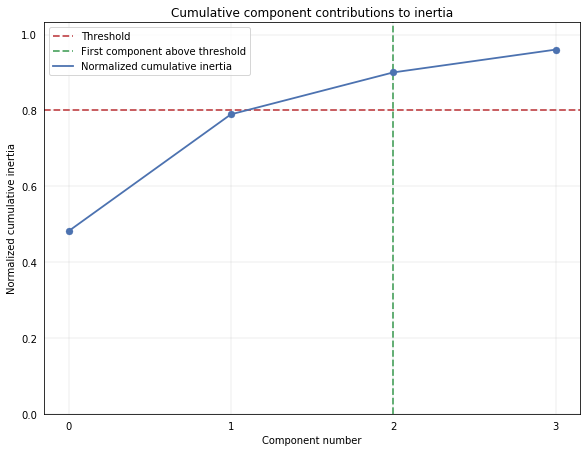

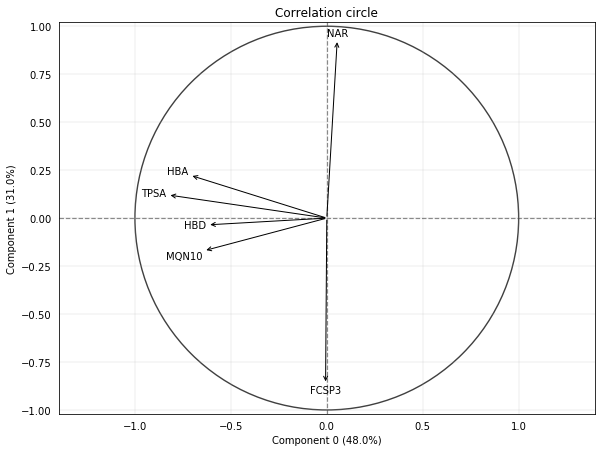

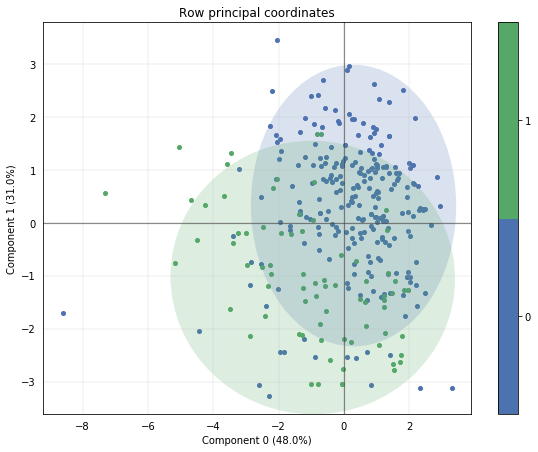

In [44]:
df_PCA_save=df_PCA
df_PCA_new=df_PCA[['ID', 'natural_product', 'TPSA', 'HBA', 'HBD', 'FCSP3', 'MQN10', 'NAR']]
df_PCA2 = df_PCA_new.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)

plt.show()

### Can we separate methods of administration

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_synonyms,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture
58,CHEMBL430,,1,0,2003.0,0,0,"[{'synonyms': 'Gemifloxacin', 'syn_type': 'FDA', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'Gemifloxacin', 'syn_type': 'USAN', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'GEMIFLOXACIN', 'syn_type': 'INN', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'GEMIFLOXACIN', 'syn_type': 'ATC', 'molecule_synonym': 'Gemifloxacin'}]",Small molecule,0,True,False,GEMIFLOXACIN,False,1
105,CHEMBL53,,1,1,2004.0,0,0,"[{'synonyms': 'Apomorphine', 'syn_type': 'FDA', 'molecule_synonym': 'Apomorphine'}, {'synonyms': 'APOMORPHINE', 'syn_type': 'BAN', 'molecule_synonym': 'Apomorphine'}, {'synonyms': 'APOMORPHINE', 'syn_type': 'ATC', 'molecule_synonym': 'Apomorphine'}]",Small molecule,1,False,True,APOMORPHINE,False,1
143,CHEMBL494,,1,0,2004.0,0,0,"[{'synonyms': 'ILOPROST', 'syn_type': 'BAN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'FDA', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'INN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'USAN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'VENTAVIS', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ventavis'}, {'synonyms': 'CILOPROST', 'syn_type': 'OTHER', 'molecule_synonym': 'Ciloprost'}, {'synonyms': 'ZK 00036374', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'ZK-00036374'}, {'synonyms': 'ILOPROST', 'syn_type': 'ATC', 'molecule_synonym': 'Iloprost'}]",Small molecule,1,False,False,ILOPROST,True,1
183,CHEMBL98,,1,2,2006.0,0,0,"[{'synonyms': 'ZOLINZA', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Zolinza'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'FDA', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'INN', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'USAN', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'ATC', 'molecule_synonym': 'Vorinostat'}]",Small molecule,0,True,False,VORINOSTAT,False,1
202,CHEMBL535,,1,2,2006.0,0,0,"[{'synonyms': 'Sunitinib', 'syn_type': 'OTHER', 'molecule_synonym': 'Sunitinib'}, {'synonyms': 'SUNITINIB', 'syn_type': 'INN', 'molecule_synonym': 'Sunitinib'}, {'synonyms': 'SU-11248', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'SU-11248'}, {'synonyms': 'Sutent', 'syn_type': 'OTHER', 'molecule_synonym': 'Sutent'}, {'synonyms': 'SUNITINIB', 'syn_type': 'ATC', 'molecule_synonym': 'Sunitinib'}]",Small molecule,0,True,False,SUNITINIB,False,1

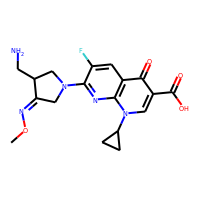
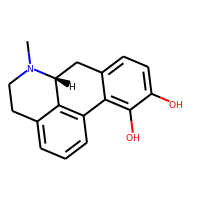
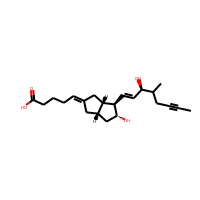
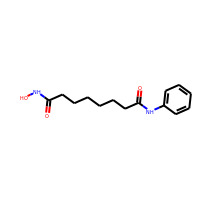
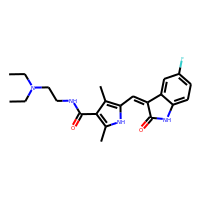

In [45]:
df_meds.head()

In [46]:
Ladm=[]
for a,b in df_meds[['oral', 'parenteral', 'topical']].iterrows():
    oral = b[0]
    parenteral = b[1]
    topical = b[2]
    if oral == 'True' and parenteral == 'False' and topical == 'False' :
        Ladm.append('O')
    elif parenteral == 'True' and oral == 'False' and topical == 'False' :
        Ladm.append('P')
    elif topical == 'True' and parenteral == 'False' and oral == 'False':
        Ladm.append('T')
    else :
        Ladm.append('M')


len(Ladm)

383

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_synonyms,molecule_type,natural_product,oral,parenteral,pref_name,topical,Mixture,Administration
58,CHEMBL430,,1,0,2003.0,0,0,"[{'synonyms': 'Gemifloxacin', 'syn_type': 'FDA', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'Gemifloxacin', 'syn_type': 'USAN', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'GEMIFLOXACIN', 'syn_type': 'INN', 'molecule_synonym': 'Gemifloxacin'}, {'synonyms': 'GEMIFLOXACIN', 'syn_type': 'ATC', 'molecule_synonym': 'Gemifloxacin'}]",Small molecule,0,True,False,GEMIFLOXACIN,False,1,O
105,CHEMBL53,,1,1,2004.0,0,0,"[{'synonyms': 'Apomorphine', 'syn_type': 'FDA', 'molecule_synonym': 'Apomorphine'}, {'synonyms': 'APOMORPHINE', 'syn_type': 'BAN', 'molecule_synonym': 'Apomorphine'}, {'synonyms': 'APOMORPHINE', 'syn_type': 'ATC', 'molecule_synonym': 'Apomorphine'}]",Small molecule,1,False,True,APOMORPHINE,False,1,P
143,CHEMBL494,,1,0,2004.0,0,0,"[{'synonyms': 'ILOPROST', 'syn_type': 'BAN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'FDA', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'INN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'ILOPROST', 'syn_type': 'USAN', 'molecule_synonym': 'Iloprost'}, {'synonyms': 'VENTAVIS', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Ventavis'}, {'synonyms': 'CILOPROST', 'syn_type': 'OTHER', 'molecule_synonym': 'Ciloprost'}, {'synonyms': 'ZK 00036374', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'ZK-00036374'}, {'synonyms': 'ILOPROST', 'syn_type': 'ATC', 'molecule_synonym': 'Iloprost'}]",Small molecule,1,False,False,ILOPROST,True,1,T
183,CHEMBL98,,1,2,2006.0,0,0,"[{'synonyms': 'ZOLINZA', 'syn_type': 'TRADE_NAME', 'molecule_synonym': 'Zolinza'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'FDA', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'INN', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'USAN', 'molecule_synonym': 'Vorinostat'}, {'synonyms': 'VORINOSTAT', 'syn_type': 'ATC', 'molecule_synonym': 'Vorinostat'}]",Small molecule,0,True,False,VORINOSTAT,False,1,O
202,CHEMBL535,,1,2,2006.0,0,0,"[{'synonyms': 'Sunitinib', 'syn_type': 'OTHER', 'molecule_synonym': 'Sunitinib'}, {'synonyms': 'SUNITINIB', 'syn_type': 'INN', 'molecule_synonym': 'Sunitinib'}, {'synonyms': 'SU-11248', 'syn_type': 'RESEARCH_CODE', 'molecule_synonym': 'SU-11248'}, {'synonyms': 'Sutent', 'syn_type': 'OTHER', 'molecule_synonym': 'Sutent'}, {'synonyms': 'SUNITINIB', 'syn_type': 'ATC', 'molecule_synonym': 'Sunitinib'}]",Small molecule,0,True,False,SUNITINIB,False,1,O

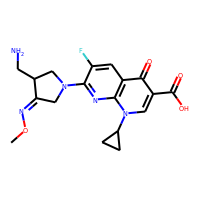
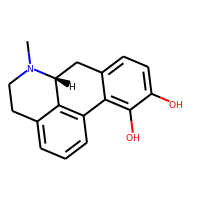
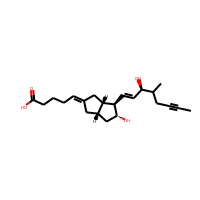
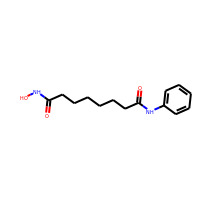
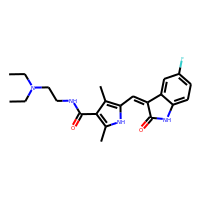

In [47]:
df_meds['Administration'] = Ladm
df_meds = df_meds[df_meds['Administration'] != 'M']

df_meds.head()

In [48]:
df_PCA = df_meds[['ROMol', 'Administration']]
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
# df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
# df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
# df_PCA['ES'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi1(m))
# df_PCA['FP'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa1(m))
# df_PCA['FP1'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa2(m))
# df_PCA['FP2'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa3(m))

df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
len(df_PCA)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

351

In [58]:
df_PCA2=df_PCA.copy()
df_PCA2['Administration'].value_counts()

O    231
P     66
T     54
Name: Administration, dtype: int64

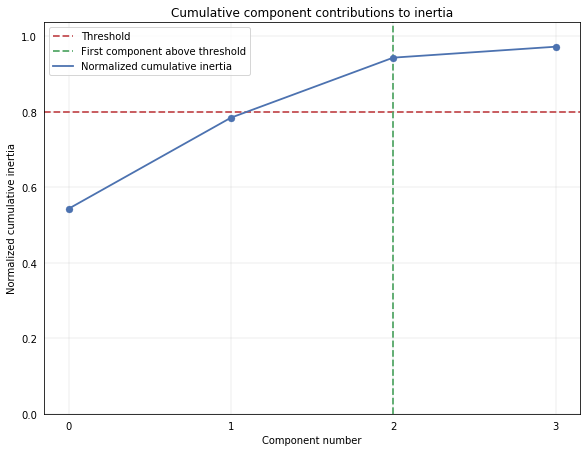

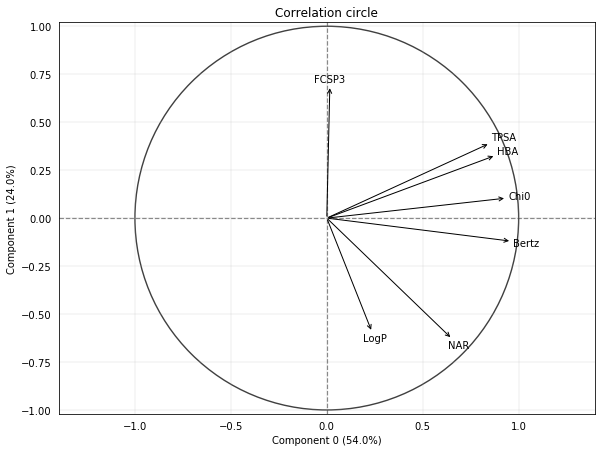

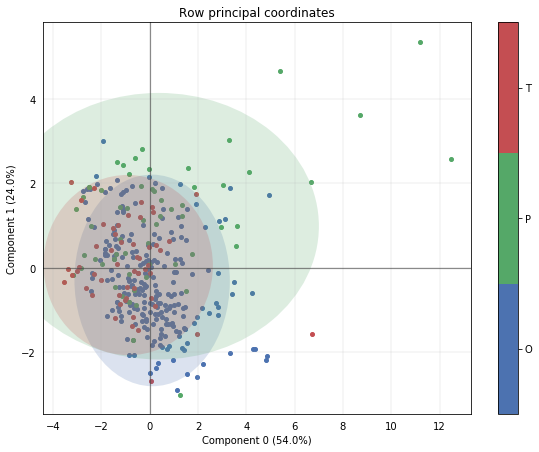

In [49]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=df_PCA.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='Administration', ellipse_fill=True)

plt.show()

### Autre dataset

,ID,ROMol,cat
0,,,ST
1,,,ST
2,,,ST
3,,,ST
4,,,ST

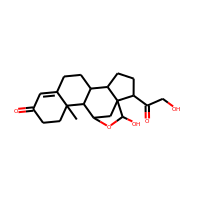
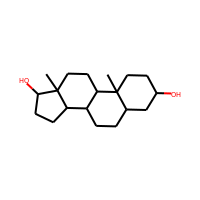
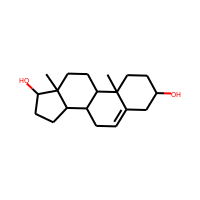
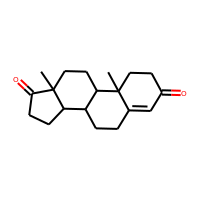
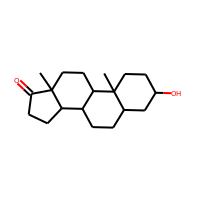

In [50]:
#Charger le dataset mix.sdf 
df_mix = PandasTools.LoadSDF('./data/mix.sdf', 
                             isomericSmiles=True)
df_mix.head()

In [55]:
df_mix['cat'].value_counts()

TH    72
Fr    50
BZ    37
ST    31
Name: cat, dtype: int64

In [56]:
#Calculer les descripteurs pour chaque molécule 
df_mix['MW'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
df_mix['LogP'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_mix['TPSA'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_mix['LabuteASA'] = df_mix.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
df_mix['HBA'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_mix['HBD'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
df_mix['FCSP3'] = df_mix.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_mix['MQN8'] = df_mix.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
df_mix['MQN10'] = df_mix.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
df_mix['NAR'] = df_mix.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_mix['NRB'] = df_mix.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

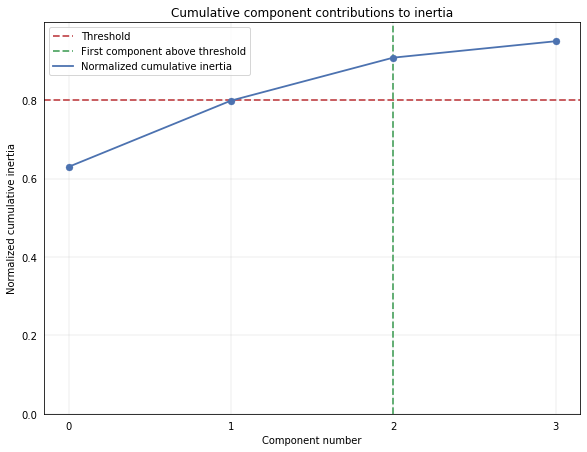

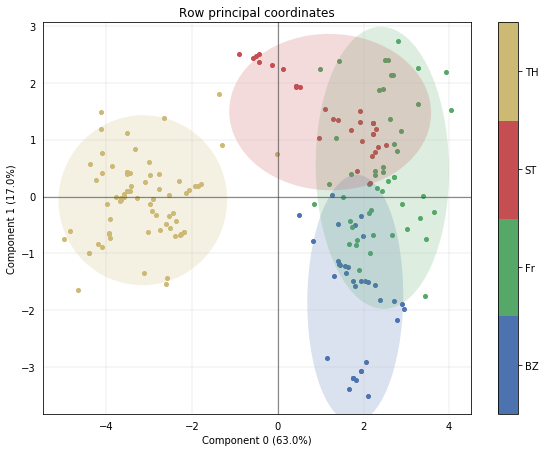

In [59]:
df_mix2=df_mix.copy()
pca_mix = prince.PCA(df_mix2, n_components=4)

fig1, ax1 = pca_mix.plot_cumulative_inertia()
fig2, ax2 = pca_mix.plot_rows(axes=[0,1], color_by='cat', ellipse_fill=True)

plt.show()

### Examen?

In [ ]:
test = PandasTools.LoadSDF('/home/bournez/Bureau/steroids.sdf', idName=None)
test['cat']=['ST' for x in test.ROMol]
for mol in test.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
    mol.SetProp('_Name', '')
test.head()

In [ ]:
test2= PandasTools.LoadSDF('/home/bournez/Bureau/thrombin.sdf')
for mol in test2.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
test2['cat']=['TH' for x in test2.ROMol]

test2.head()


In [ ]:
test3 = PandasTools.LoadSDF('/home/bournez/Bureau/benzo.sdf')
test3['cat']=['BZ' for x in test3.ROMol]
test3.head()

In [ ]:
test4 = PandasTools.LoadSDF('/home/bournez/Téléchargements/chbrbb-interesting.sdf')
test4=test4.sample(50)
test4['cat']=['Fr' for x in test4.ROMol]
test4.head()

In [ ]:
alls=pd.concat([test[['ROMol', 'cat']], test2[['ROMol', 'cat']], test3[['ROMol', 'cat']], test4[['ROMol', 'cat']]], ignore_index=True)
len(alls)

In [ ]:
test.EXACT_MASS = test.EXACT_MASS.astype(float)
test = test[test.EXACT_MASS.between(200, 700)]
len(test)

In [ ]:
test['Toxin'] = ['1' for x in test['EXACT_MASS']]
test.head()

In [ ]:
df_PCA['Toxin'] = ['0' for x in df_PCA['ID']]
df_PCA.head()

In [ ]:
# df_PCA_t = df_PCA[['ROMol', 'Toxin']]
# test_t = test[['ROMol', 'Toxin']].sample(300)

#alls = pd.concat([test_t, df_PCA_t])
#alls = df_PCA

alls['MW'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
alls['LogP'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
alls['TPSA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
alls['LabuteASA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
alls['HBA'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
alls['HBD'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
alls['FCSP3'] = alls.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
alls['MQN8'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
alls['MQN10'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
alls['NAR'] = alls.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
alls['NRB'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
alls['Chi'] = alls.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))

In [ ]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=alls.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='cat', ellipse_fill=True)
#fig3, ax3 = pca1.plot_rows(axes=[1,2], color_by='Administration', ellipse_fill=True)

plt.show()

In [ ]:
PandasTools.WriteSDF(alls, '/home/bournez/Bureau/exam.sdf', properties=['cat'])

In [ ]:
PandasTools.LoadSDF('/home/bournez/Bureau/exam.sdf')

In [ ]:
#Pour regarder tous les descripteurs :
plt.figure(figsize=(20, 16))

j=1
for i in alls.iloc[:, 2:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(alls[alls['Toxin'] == '0'][i] , color="skyblue", label="Non toxic", kde=False)
    sns.distplot(alls[alls['Toxin'] == '1'][i] , color="red", label="Toxic", kde=False)
    plt.legend()
    j += 1

### With Scikit-Learn

In [52]:
# split data table into data X and class labels y
X = df_PCA_save.iloc[:, 3:].values
y = df_PCA_save.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Reduced dataset shape: (318, 4)


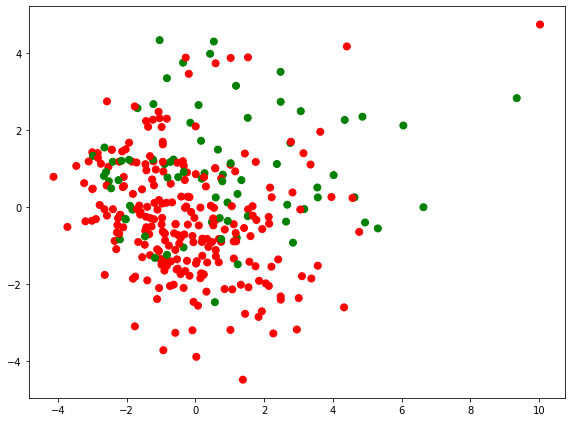

In [53]:
def color(x):
    if x == '0' :
        return('red')
    else :
        return'green'

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_std)
X_reduced = pca.transform(X_std)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[color(x) for x in df_PCA_save.natural_product],
           cmap='RdYlBu')



In [54]:
#Contribution dezs variables
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.74243666, -0.57707712,  0.20505678, -0.00976283],
       [-0.24039319, -0.85478299,  0.29073903,  0.21386412],
       [ 0.89966995,  0.30590956, -0.20082337, -0.11215916],
       [ 0.69764411, -0.62117369,  0.22911243,  0.02976639],
       [ 0.83685497,  0.03958441, -0.1092225 , -0.36989802],
       [ 0.63779762,  0.46641946, -0.21136101,  0.2701966 ],
       [ 0.01647188,  0.3977343 ,  0.83216493,  0.07444928],
       [ 0.50181645,  0.17203182, -0.43990231,  0.64017438],
       [ 0.77204637,  0.25593799,  0.29430313, -0.24773825],
       [ 0.18665472, -0.69304842, -0.61772875, -0.14206298],
       [ 0.580714  , -0.19049474,  0.44742161,  0.2950259 ]])

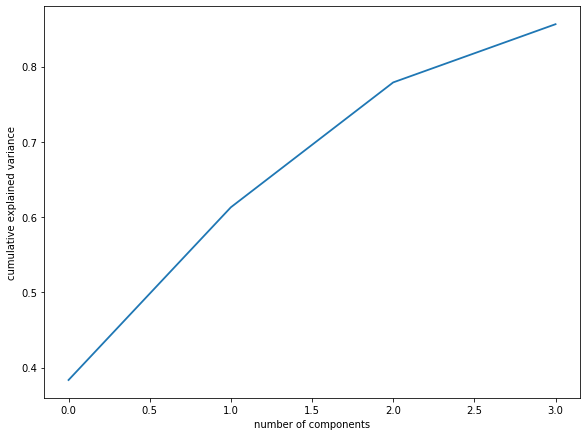

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
#Covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00315457  0.36065547  0.45387728  0.98315361  0.56318785  0.19041065
  -0.00697496  0.18755237  0.44464537  0.37747969  0.49854506]
 [ 0.36065547  1.00315457 -0.5303484   0.42090109 -0.36290779 -0.51236137
  -0.10653895 -0.27028058 -0.32240752  0.31518804  0.16770606]
 [ 0.45387728 -0.5303484   1.00315457  0.38692041  0.80710326  0.72494217
  -0.02953478  0.52162316  0.74457972  0.09078047  0.31001603]
 [ 0.98315361  0.42090109  0.38692041  1.00315457  0.51135378  0.15236402
   0.00378151  0.16963817  0.38982181  0.38473342  0.50451056]
 [ 0.56318785 -0.36290779  0.80710326  0.51135378  1.00315457  0.38150752
  -0.02247454  0.3113817   0.61298682  0.2439013   0.33788286]
 [ 0.19041065 -0.51236137  0.72494217  0.15236402  0.38150752  1.00315457
   0.04678011  0.51476216  0.46248628 -0.07992675  0.19991915]
 [-0.00697496 -0.10653895 -0.02953478  0.00378151 -0.02247454  0.04678011
   1.00315457 -0.2075417   0.21262567 -0.7598106   0.2195193 ]
 [ 0.18755237 -0.27028

In [57]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.36088091  0.3626534  -0.15156557 -0.01057007  0.30563526 -0.04327739
   0.07996522  0.70434755 -0.10511127  0.32281566  0.04603862]
 [-0.11684944  0.53717249 -0.21489671  0.23154745  0.02842945 -0.17181303
   0.20466093  0.0103513  -0.02619953 -0.71480983  0.11847529]
 [ 0.43730829 -0.19224318  0.14843649 -0.12143302  0.0473097  -0.03507706
   0.09381855 -0.090111   -0.74277908 -0.28430759 -0.28650054]
 [ 0.33910831  0.39036507 -0.16934606  0.03222762  0.31205813 -0.0408884
   0.03544685 -0.70163754  0.0281551   0.32788194  0.04473055]
 [ 0.40677542 -0.02487609  0.08073067 -0.40048299  0.05403722  0.47792375
  -0.21448874  0.00822321  0.23261655 -0.3445632   0.46558827]
 [ 0.31001834 -0.29311265  0.15622528  0.29253777  0.18687907 -0.65675477
  -0.36539917  0.02589342  0.19960874 -0.13228575  0.22407167]
 [ 0.00800659 -0.24994873 -0.615086    0.08060511  0.35070137  0.21091046
  -0.32277191  0.03177821  0.15471953 -0.19020274 -0.4688839 ]
 [ 0.24392112 -0.1081102   0

In [58]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.219132268510277
2.5241568964532344
1.8246487882002767
0.8504093035772236
0.5715613876961664
0.4444678178055337
0.3022554980034664
0.11088943768296308
0.0885266472072409
0.04759733997298229
0.016354614890633463


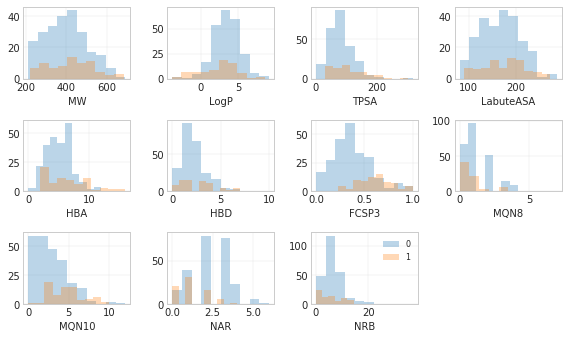

In [59]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: '0',
              2: '1'}

feature_dict = {0: 'MW',
                1: 'LogP',
                2: 'TPSA',
                3: 'LabuteASA',
                4: 'HBA',
                5 : 'HBD', 
                6: 'FCSP3',
                7:'MQN8',
                8:'MQN10', 
                9:'NAR',
                10:'NRB'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(11):
        plt.subplot(4, 4, cnt+1)
        for lab in ('0', '1'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()